In [1]:
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Select Run File to Display

In [17]:
# create a list of data files
file_list = []
for name in glob.glob('data/*'):
    file_list.append(name) 
    
# create dropdown menu with list of data files
selected_file = widgets.Dropdown(
    options=file_list,
   description='File name:',
    disabled=False)

# display the widget
display(selected_file)

Dropdown(description='File name:', options=('data/data_20204606T194655.csv', 'data/data_20200406T140408.csv', …

# Display Plots of Selected File

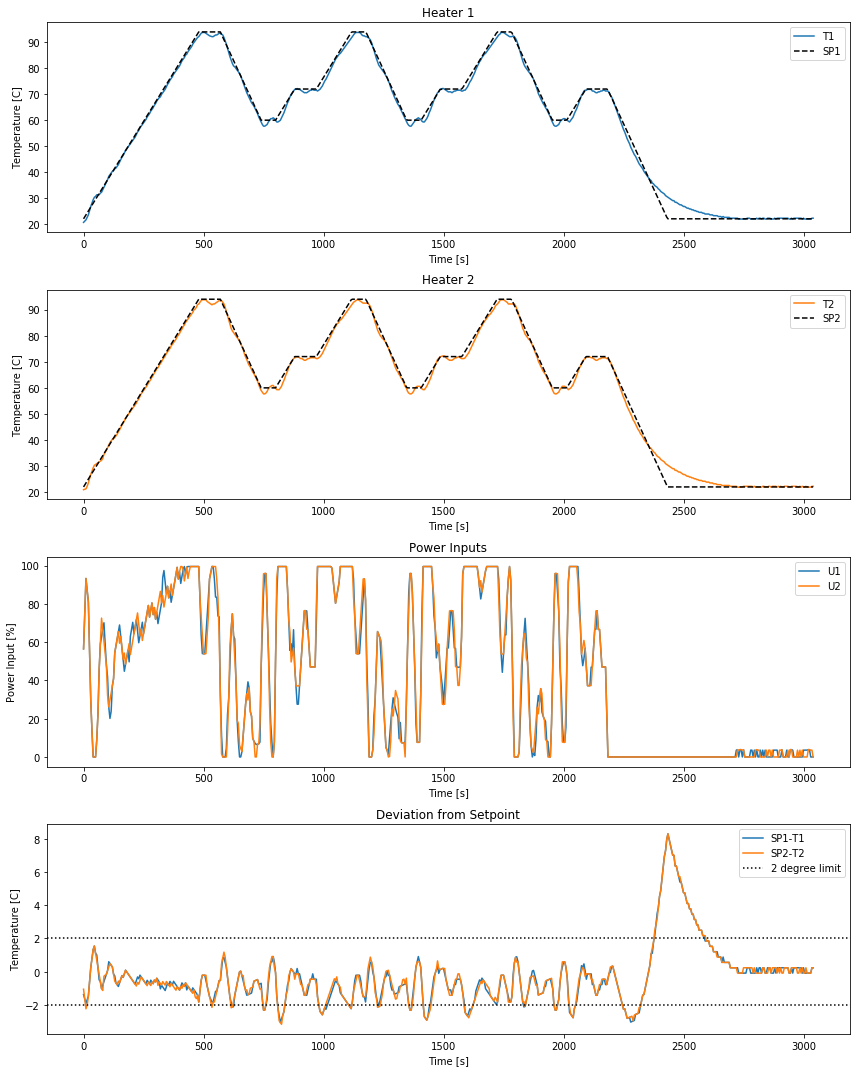

In [25]:
df1 = pd.read_csv(selected_file.value)
fig, ax = plt.subplots(4,1, figsize=(12,15))

# Subplot 1 - Heater 1
ax[0].plot(df1['Time'], df1['T1'], label = 'T1', color = '#1f77b4')
ax[0].plot(df1['Time'], df1['SP1'], label = 'SP1', ls= '--', color ='k')
ax[0].set_title('Heater 1')
ax[0].set_ylabel('Temperature [C]')
ax[0].set_xlabel('Time [s]')
ax[0].legend(loc = 'best')


# Subplot 2 - Heater 2
ax[1].plot(df1['Time'], df1['T2'],  label = 'T2', color = '#ff7f0e')
ax[1].plot(df1['Time'], df1['SP2'],  label = 'SP2',ls = '--', color ='k')
ax[1].set_title('Heater 2')
ax[1].set_ylabel('Temperature [C]')
ax[1].set_xlabel('Time [s]')
ax[1].legend(loc = 'best')

# Subplot 3 - Power Inputs
ax[2].plot(df1['Time'], df1['U1'], label = 'U1', color = '#1f77b4')
ax[2].plot(df1['Time'], df1['U2'], label = 'U2', color = '#ff7f0e')
ax[2].legend(loc = 'best')
ax[2].set_title('Power Inputs')
ax[2].set_ylabel('Power Input [%]')
ax[2].set_xlabel('Time [s]')


ax[3].plot(df1['Time'], df1['T1']- df1['SP1'], label = 'SP1-T1', color = '#1f77b4')
ax[3].plot(df1['Time'], df1['T2']- df1['SP2'], label = 'SP2-T2', color = '#ff7f0e')
ax[3].axhline(y = 2, linestyle = ':', color = 'k', label = '2 degree limit')
ax[3].axhline(y = -2, linestyle = ':', color = 'k')
ax[3].legend(loc = 'best')
ax[3].set_title('Deviation from Setpoint')
ax[3].set_ylabel('Temperature [C]')
ax[3].set_xlabel('Time [s]')

plt.tight_layout()
plt.show()
